# Mall Customers Analysis

This short project considers a fictional dataset, of a small population of 200 customers of the mall with four basic variables assigned to each of the clients. The aim of this project is to explore basic statistics and visualization methods that are used in the preliminary customer data analysis. 

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


The table above gives a valuable big picture of the dataset and helps identify possible outliers or errors (for example, unusual high/low age, or Spending Score out of the range, etc).
It seems that the dataset is clean and may be used for customer analysis.

Text(0.5, 1.0, 'Distribution of Gender')

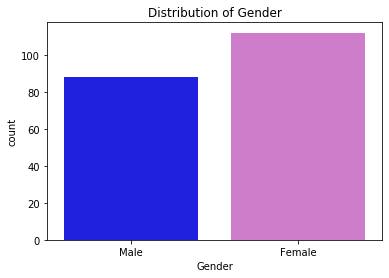

In [4]:
# gender distribution

sns.countplot(x='Gender', data=customers, palette=['blue','orchid'])
plt.title('Distribution of Gender')

([<matplotlib.patches.Wedge at 0x1fab991e848>,
 [Text(-0.15030912462654575, 1.089682140375808, 'Female'),
  Text(0.15030912462654514, -1.089682140375808, 'Male')],
 [Text(-0.08198679525084313, 0.5943720765686223, '54.4%'),
  Text(0.08198679525084279, -0.5943720765686225, '45.6%')])

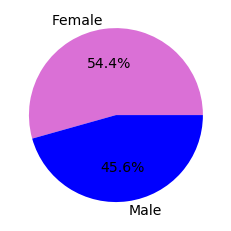

In [18]:
sums = customers.CustomerID.groupby(customers.Gender).sum()
plt.pie(sums, labels=sums.index, colors=['orchid','blue'], autopct='%1.1f%%', textprops={'fontsize': 14})

Text(0.5, 0, 'Age')

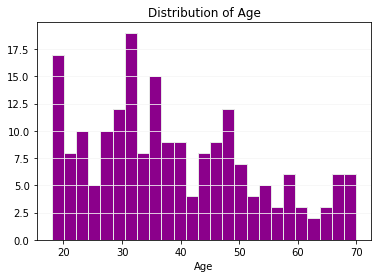

In [6]:
# Age distribution

plt.hist(customers['Age'], edgecolor='#E6E6E6', color='darkmagenta', bins=25)
plt.grid(axis='y', color='whitesmoke', linestyle='solid')
plt.title('Distribution of Age')
plt.xlabel('Age')

The first step to understanding well the customers is to analyze their demographics. 
In terms of gender distribution, females are the majority, representing 54,4% of the customers. 
On the other spectrum bar chart of the Age Distribution shows that most representatives are the customers of younger age, especially those between 30 and 40. What confirms the previous statistics, which calculated the mean age of the population to be equal to 38.
Secondly, I will analyze Age distribution by Gender.

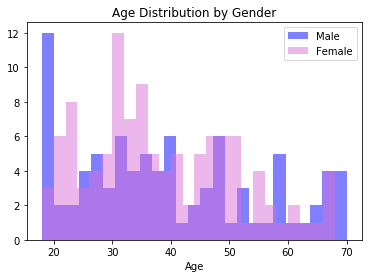

In [7]:
# Age Distribution by Gender

plt.hist('Age', data=customers[customers['Gender']=='Male'], alpha=0.5, label='Male', color='blue', bins=25)
plt.hist('Age', data=customers[customers['Gender']=='Female'], alpha=0.5, label='Female', color='orchid', bins=25)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.legend()

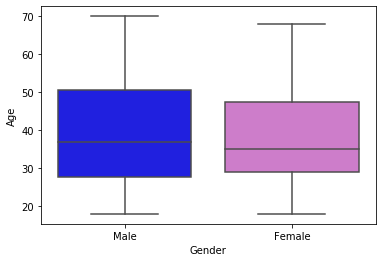

In [8]:
sns.boxplot(x=customers['Gender'], y=customers['Age'], palette=['blue','orchid'])

Interesting to observe that most of the customers under the age of 20 and over 65 are males. This can be easily seen on the histogram with blue bars spiking at both extremes of the graph, but also on the boxplot, where the blue rectangle is longer than a pink one. Women, on the other hand, have a greater representation in the customers of age 30-35 and 45-55.

Next, I will look closer to Income and its analysis by Gender.

Text(0.5, 0, 'Thousands of Dollars')

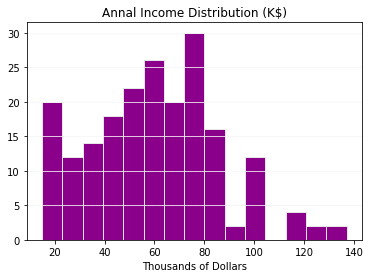

In [9]:
# Annual Income Distribution

plt.hist(customers['Annual Income (k$)'], edgecolor='#E6E6E6', color='darkmagenta', bins=15)
plt.grid(axis='y', color='whitesmoke', linestyle='solid')
plt.title('Annal Income Distribution (K$)')
plt.xlabel('Thousands of Dollars')

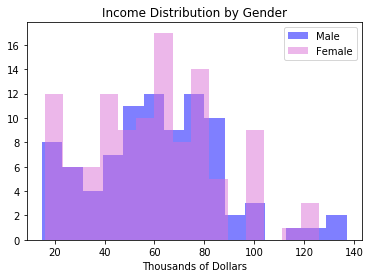

In [10]:
# Income Distribution by Gender

plt.hist('Annual Income (k$)', data=customers[customers['Gender']=='Male'], alpha=0.5, label='Male', color='blue', bins=15)
plt.hist('Annual Income (k$)', data=customers[customers['Gender']=='Female'], alpha=0.5, label='Female', color='orchid', bins=15)
plt.title('Income Distribution by Gender')
plt.xlabel('Thousands of Dollars')
plt.legend()

The biggest representation of customers as a whole is seen in the 45-80K\\$ of Income level. While analyzing the same data by Gender, a clear segmentation emerges: there are more women than men at lower Income levels (below 70K\\$) and more men than women in the higher income levels.
Gender may be an important variable influencing sales and therefore revenues of the company. Let's keep a closer look at the other indicators having in mind the Gender separation.

In [11]:
# Creating dfs separated by Gender
male_custom = customers[customers['Gender']=='Male']
female_custom = customers[customers['Gender']=='Female']

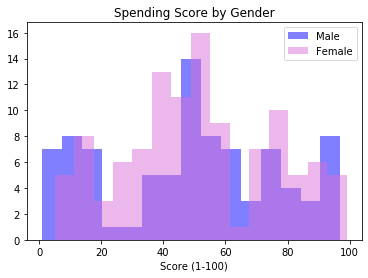

In [20]:
# Spending Score by Gender

plt.hist('Spending Score (1-100)', data=male_custom, alpha=0.5, label='Male', color='blue', bins=15)
plt.hist('Spending Score (1-100)', data=female_custom, alpha=0.5, label='Female', color='orchid', bins=15)
plt.title('Spending Score by Gender')
plt.xlabel('Score (1-100)')
plt.legend()

In [12]:
# Let's compare the avg spending score for each gender
print('Avg spending score for men:', male_custom['Spending Score (1-100)'].mean())
print('Avg spending score for women:', female_custom['Spending Score (1-100)'].mean())

Avg spending score for men: 48.51136363636363
Avg spending score for women: 51.526785714285715


In the given dataset women have a higher spending score than men by 5 percentage points. Data shows that female customers spent more even though they earn less, what follows the common behavioural patern. Men therfore, represent a high potential in this market, nevertheless, there is no enough data to use this information constructively (as for example: spending per purchase, types of products bought and its representation in the mall asortyment).

In the next step I will try to see if there are any long term relations between some of the variables.

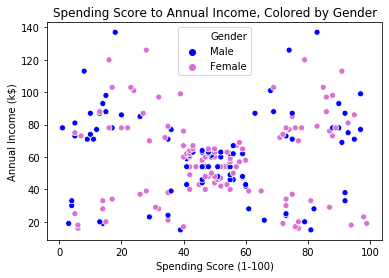

In [13]:
# Annual Income and Spending Score relation by Gender
sns.scatterplot('Spending Score (1-100)', 'Annual Income (k$)', hue='Gender', data=customers, palette=['blue','orchid']);
plt.title('Spending Score to Annual Income, Colored by Gender');

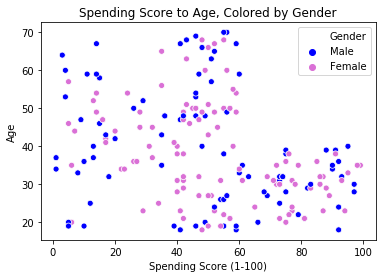

In [14]:
# Age and Spending Score relation by Gender
sns.scatterplot('Spending Score (1-100)', 'Age', hue='Gender', data=customers, palette=['blue','orchid']);
plt.title('Spending Score to Age, Colored by Gender');

Both scatter plots do not seem to reveal any significant relation, they are letteraly scatter all over the graph. I could say that there may be a relation between Age and Spending Score (younger people tend to spend more), but it is not very clear.
Let's have a look at the correlation heatmap, using all the variables. On the scale bewteen -1 (negative correlation) till 1 (positive correlation), most of them seem to hang around 0 (no correlation). I do not take into consideration results for CustomerID as it is simply list of ordered numbers assigned randomly to the customers.

Text(0.5, 1, 'Correlation Heatmap - Female')

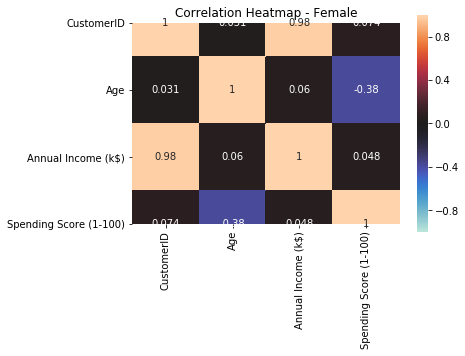

In [33]:
sns.heatmap(female_custom.corr(), annot=True, vmin=-1, vmax=1, center= 0, square=True)
plt.title('Correlation Heatmap - Female')

Text(0.5, 1, 'Correlation Heatmap - Male')

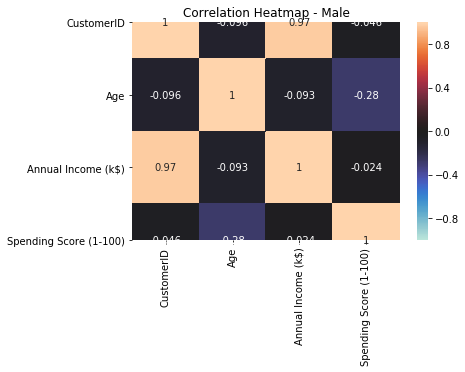

In [35]:
sns.heatmap(male_custom.corr(), annot=True, vmin=-1, vmax=1, center= 0)
plt.title('Correlation Heatmap - Male')

Analysis of both correlation matrices shows that for women age and spending scores are more correlated than in men cases. It is also the highest correlation between any two variables that makes sense.

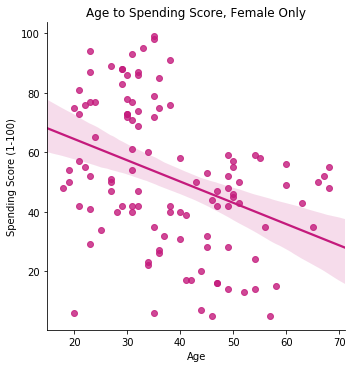

In [34]:
sns.set_palette("PiYG",9)
sns.lmplot('Age', 'Spending Score (1-100)', data=female_custom);
plt.title('Age to Spending Score, Female Only');

Looking at the graph above we clearly see that we cannot talk about any significant correlation here. There are only a few data points that fall into the confidence intervals and close to the "best-fit line". 
This fictional mall would have to gather better data: more observations, more variables that could help explain the dynamics of the customers' purchases. With the information given I am unable to find any significant causal effects in the data that could effectively improve the mall's marketing and selling strategies.

Nevertheless, I could perform a pre-analysis of the customers and their demographics. Knowing that women earn less but still are willing to buy more, maybe a good indicator of marketing cheaper products to them to increase the frequency of their purchases. It would also make sense to create a personalized strategy for young women, who tend to spend the most, therefore are important target groups.
There is still high potential for male customers, which should be analyzed deeper to understand their preferences and spending trends.

An extra analysis that may be done here is the clustering. Since I could not find any significant correlation between two variables, maybe it fill be better explained with clusters.

## K-Means Clustering

For determining the number of clusters (k) I will use the Elbow Method.

In [79]:
from sklearn.cluster import KMeans

df = customers.loc[:,['Annual Income (k$)','Spending Score (1-100)']]
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

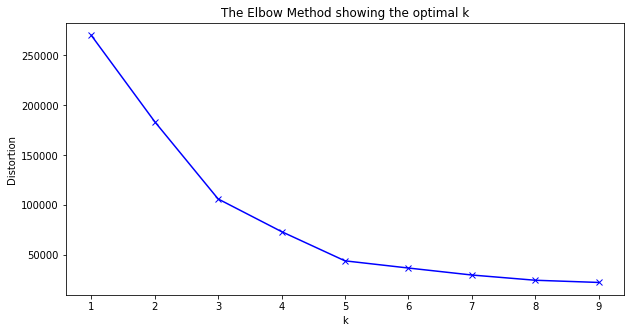

In [80]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The graph above shows a two possible choices, a 3 or a 5. Looking at the previous scatter plot of both Spending score and Annual Income, I believe that k=5 will be an optimal choice.

In [97]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)
df['k_means']=kmeanModel.predict(df)

#define a custom palette
customPalette = ['lightpink', 'deepskyblue', 'firebrick', 'orange', 'limegreen']
sns.set_palette(customPalette)
sns.palplot(customPalette)

[None, None]

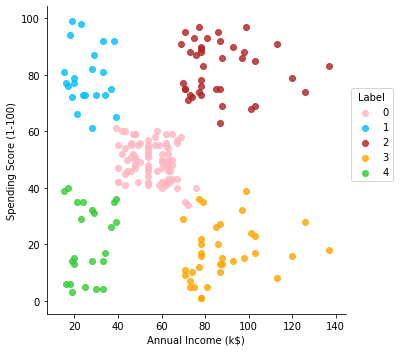

In [123]:
clusters = sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='k_means',
           fit_reg=False, legend=False)
#add a legend
leg = clusters.ax.legend(bbox_to_anchor=[1, 0.75], title="Label", fancybox=True)

This visualization helps to clearly identify clusters, which using adittional demographic data on the cstomers, may help in distinguishing specific target groups. Such analysis will allow to create more efficient marketing strategy that will target particular need, keeping in mind each customer group constraints.

Cluster 0- Represents customers with the medium income and medium annual spending.

Cluster 1- Represents customers with the low income but high spending score.

Cluster 2- Represents customers with the high income and high spending score.

Cluster 3- Represents customers with the high income but low spending score (high potential for increasing revenue).

Cluster 4- Represents customers with the low income and low spending score.